In [1]:
from __future__ import print_function

### Load Libraries

In [2]:
import os
import sys
sys.path.append('../')

from hparams.yparams import YParams
from parse_tensorboard_tfevents import get_training_history
from median_filt import medfilt

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('demo_style.mplstyle')

In [3]:
logsdir = '../logs/'
experiments_dirs = [os.path.join(logsdir, d) for d in os.listdir(logsdir) if os.path.isdir(os.path.join(logsdir, d))]

### Examine learning curves

In [4]:
train_hists = {}
valid_hists = {}
for _exp in experiments_dirs:
    _trn, _vld = get_training_history(model_dir=_exp)
    train_hists[_exp] = _trn
    valid_hists[_exp] = _vld

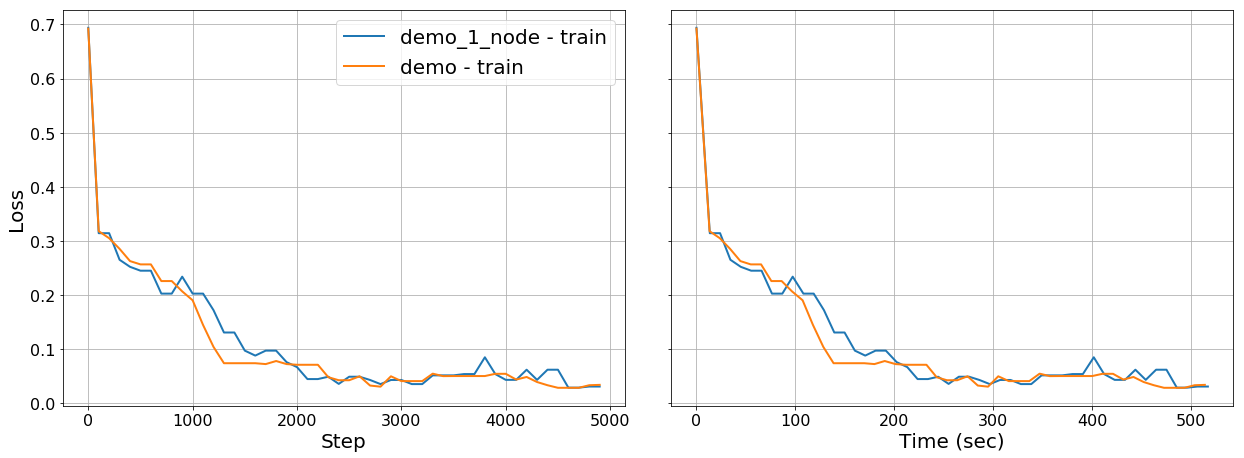

In [5]:
figs, axs = plt.subplots(1, 2, figsize=(17,6))
plt.tight_layout(pad=0.4, w_pad=0.04, h_pad=0.01)

for _exp in experiments_dirs:
    _trn, _vld = train_hists[_exp], valid_hists[_exp]
    _exp_name = os.path.basename(_exp)
    axs[0].plot(_trn['loss']['steps'], medfilt(_trn['loss']['values'], 5), '-', label=_exp_name + ' - train');
    axs[1].plot(_trn['loss']['time'], medfilt(_trn['loss']['values'], 5), '-', label=_exp_name + ' - train');
    
axs[0].set_ylabel('Loss');
axs[0].set_xlabel('Step');
axs[0].legend(loc=1);
axs[0].grid(True);
axs[1].set_xlabel('Time (sec)');
axs[1].grid(True);
axs[1].get_yaxis().set_ticklabels([]);

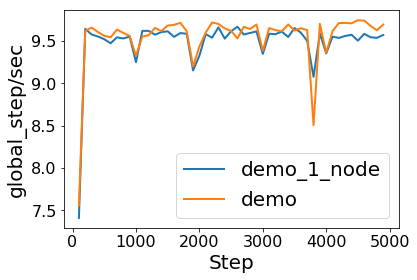

In [6]:
for _exp in experiments_dirs:
    _trn = train_hists[_exp]
    _exp_name = os.path.basename(_exp)
    plt.plot(_trn['global_step/sec']['steps'], _trn['global_step/sec']['values'], label=_exp_name);
plt.ylabel('global_step/sec');
plt.xlabel('Step');
plt.legend(loc=0);